In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

/home/hoseung/anaconda3/envs/nia/lib/python3.11/site-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


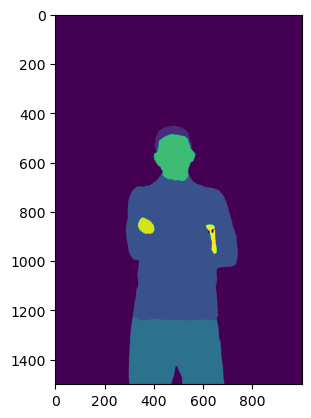

In [2]:
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"

image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
plt.imshow(pred_seg)

In [22]:
from transformers import Trainer, AutoProcessor

In [12]:
from datasets import load_dataset_builder, load_dataset

In [9]:
ds_builder = load_dataset_builder("mattmdjaga/human_parsing_dataset")

Check dataset's meta data.   
If OK, proceed to download

In [11]:
ds_builder.info.features

{'image': Image(decode=True, id=None), 'mask': Image(decode=True, id=None)}

In [17]:
# download dataset for training 
dataset = load_dataset("mattmdjaga/human_parsing_dataset", split="train")

In [18]:
dataset

Dataset({
    features: ['image', 'mask'],
    num_rows: 17706
})

In [21]:
# 원랜 이렇게 하면 안 됨... 
train_data = dataset.shuffle().select(range(10000))
test_data = dataset.shuffle().select(range(2000))
valid_data = dataset.shuffle().select(range(2000))

(자동) Preprocessing 

In [ ]:
def process_examples(examples, image_processor):
    # Get batch of images
    images = examples['image']

    # Preprocess
    inputs = image_processor(images=images)
    # Add pixel_values
    examples['pixel_values'] = inputs['pixel_values']

    return examples


In [1]:
trainer = Trainer(model, 
                 train_dataset=)

In [ ]:
m = 